### 1. Affect on Coefficients

In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = load_diabetes()

In [6]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [9]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

In [10]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [11]:
df.shape

(442, 11)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["Target"], axis=1), df['Target'], test_size=0.2, random_state=2)

In [21]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [43]:
coefs = []
r2 = []

for i in [0, 10, 100, 1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2.append(r2_score(y_test, y_pred))

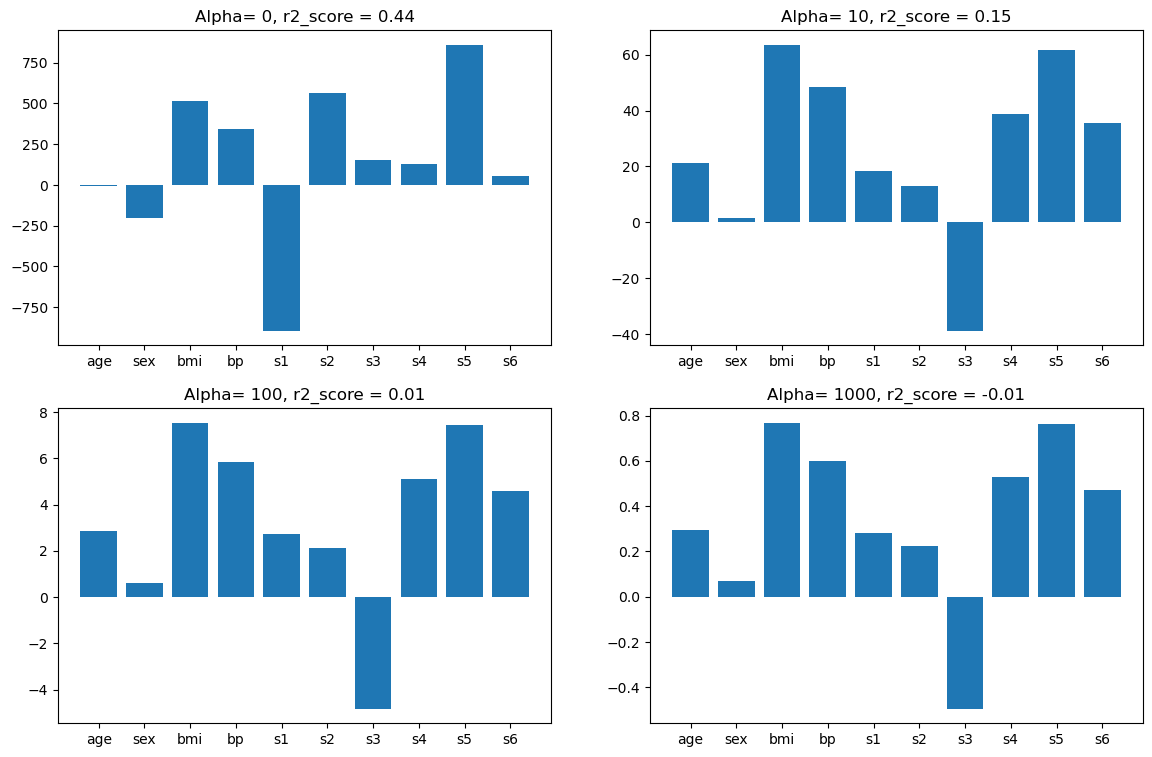

In [42]:
plt.figure(figsize=(14, 9))
plt.subplot(221)
plt.bar(data.feature_names, coefs[0])
plt.title(f'Alpha= 0, r2_score = {round(r2[0], 2)}')

plt.subplot(222)
plt.bar(data.feature_names, coefs[1])
plt.title(f'Alpha= 10, r2_score = {round(r2[1], 2)}')

plt.subplot(223)
plt.bar(data.feature_names, coefs[2])
plt.title(f'Alpha= 100, r2_score = {round(r2[2], 2)}')

plt.subplot(224)
plt.bar(data.feature_names, coefs[3])
plt.title(f'Alpha= 1000, r2_score = {round(r2[3], 2)}')

plt.show()

In [46]:
coefs = []
r2 = []

for i in [0, 0.0001, 0.001, 0.01, 0.1, 10]:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2.append(r2_score(y_test, y_pred))

In [49]:
r2

[0.4399338661568968,
 0.4400429511552675,
 0.44086171139200303,
 0.4439392894728018,
 0.45199494197195467,
 0.15214327672566985]

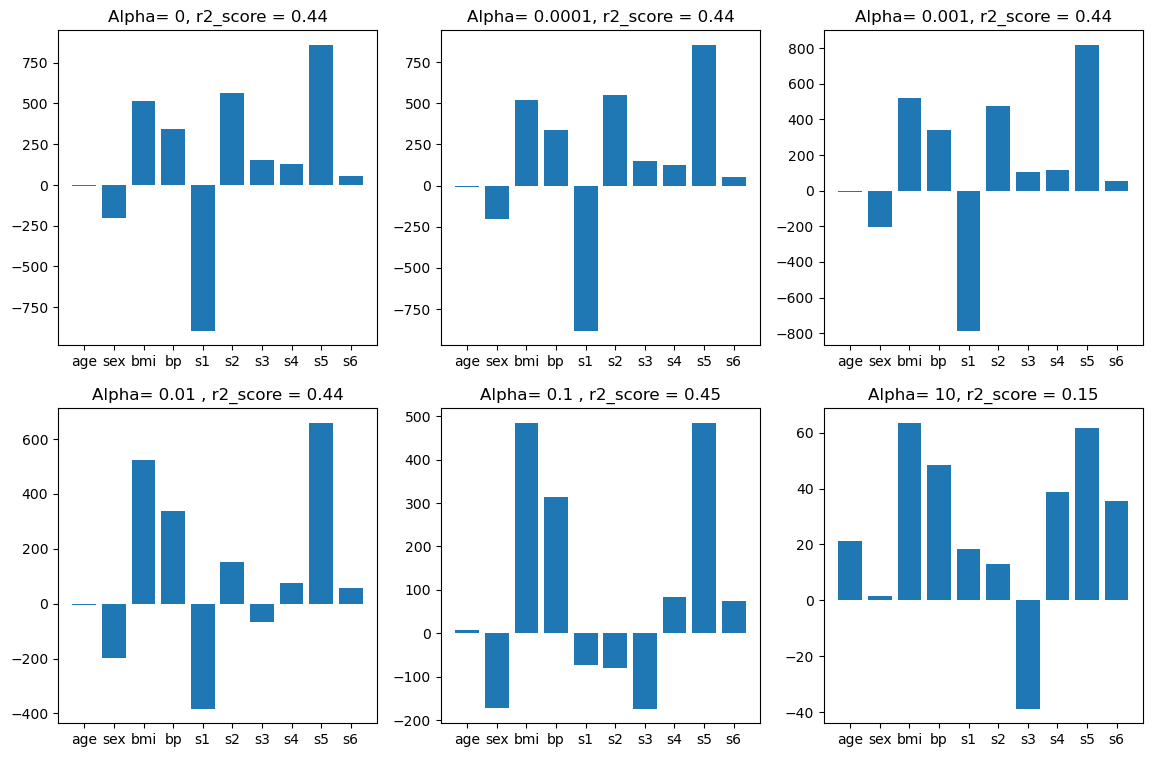

In [48]:
plt.figure(figsize=(14, 9))
plt.subplot(231)
plt.bar(data.feature_names, coefs[0])
plt.title(f'Alpha= 0, r2_score = {round(r2[0], 2)}')

plt.subplot(232)
plt.bar(data.feature_names, coefs[1])
plt.title(f'Alpha= 0.0001, r2_score = {round(r2[1], 2)}')

plt.subplot(233)
plt.bar(data.feature_names, coefs[2])
plt.title(f'Alpha= 0.001, r2_score = {round(r2[2], 2)}')

plt.subplot(234)
plt.bar(data.feature_names, coefs[3])
plt.title(f'Alpha= 0.01 , r2_score = {round(r2[3], 2)}')

plt.subplot(235)
plt.bar(data.feature_names, coefs[4])
plt.title(f'Alpha= 0.1 , r2_score = {round(r2[4], 2)}')

plt.subplot(236)
plt.bar(data.feature_names, coefs[5])
plt.title(f'Alpha= 10, r2_score = {round(r2[5], 2)}')

plt.show()

### 2. Higher values(i.e. weights) are impacted more

In [75]:
alphas = [0, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_.tolist())

In [76]:
input_arr = np.array(coefs)

In [78]:
alphas = [0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train, y_train)
    
    coefs.append(reg.coef_.tolist())

In [80]:
input_arr = np.array(coefs).T

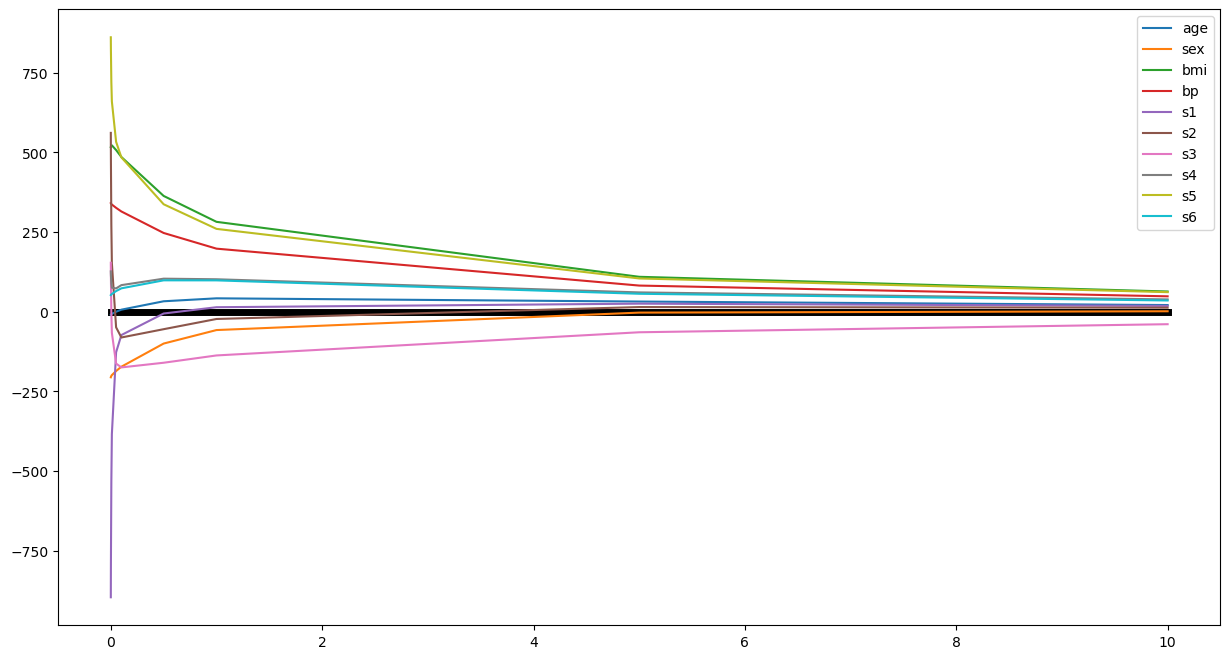

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(alphas, np.zeros(len(alphas)), color='black', linewidth=5)
for i in range(input_arr.shape[0]):
    plt.plot(alphas, input_arr[i], label=data.feature_names[i])

plt.legend()

In [62]:
data.feature_names[i]

's6'

### 3. Impact on Bias & Variance

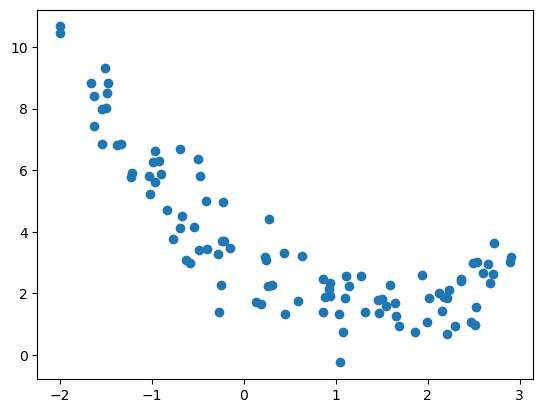

In [140]:
m = 100
X = 5*np.random.rand(m,1) - 2
y = 0.7 * X ** 2 - 2*X + 3 + np.random.randn(m,1)

plt.scatter(X, y)
plt.show()

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X.reshape(100,1), y.reshape(100), test_size=0.2, random_state=2)

In [143]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [147]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg,
        X_train,
        y_train,
        X_test,
        y_test,
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

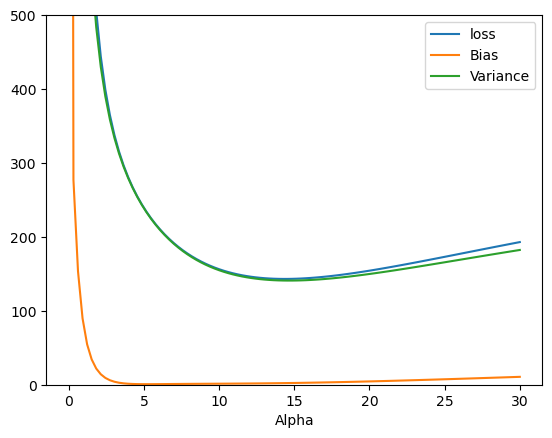

In [154]:
plt.plot(alphas, loss, label='loss')
plt.plot(alphas, bias, label='Bias')
plt.plot(alphas, variance, label='Variance')
plt.ylim(0,500)
plt.xlabel('Alpha')
plt.legend()

- visualization differs from the video
- it only shows for bias and not for loss and variance

### 4. Effect of Regularization on loss function

[27.82809103]
-2.29474455867698


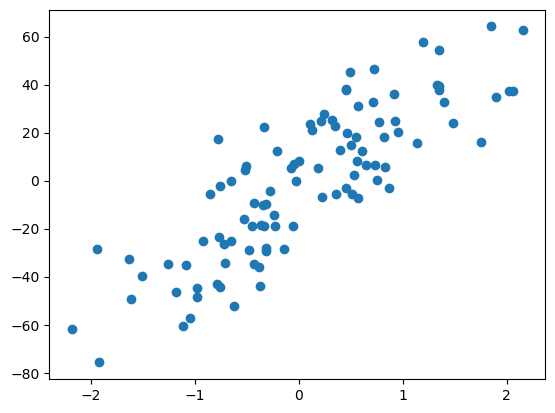

In [155]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, n_targets=1, n_informative=1, noise=20, random_state=13)

plt.scatter(X, y)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

print(lr.coef_)
print(lr.intercept_)

In [163]:
def cal_loss(m, alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [164]:
def predict(m):
    return m*X + 2.29

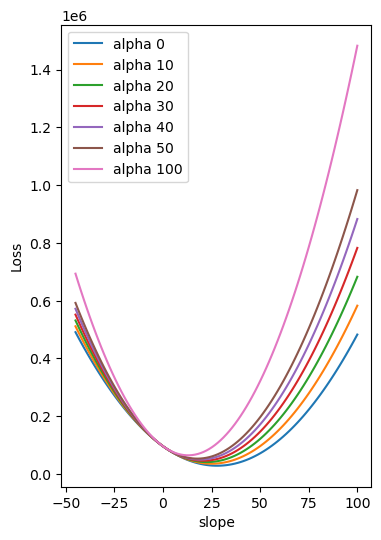

In [165]:
m = np.linspace(-45, 100, 100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss= []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i], j)
        loss.append(loss_i)
    plt.plot(m, loss, label=f'alpha {j}')
plt.legend()
plt.xlabel('slope')
plt.ylabel('Loss')
plt.show()